In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

38.359556500520625 170.23098482354044
-38.50951187962449 21.415630504815113
76.29660067057898 174.96943568914617
71.62426214758878 -134.48272894012683
87.9524518053106 -93.88693218186557
21.456254285490843 -135.98463749420452
2.5911021674014734 -20.823216481804764
-45.96678447767563 49.79029468658155
-50.23077174711612 -22.585501066676102
-35.137875364144065 -61.882038781597544
61.537572022253556 76.76046456692762
46.635173924019654 -66.7840252510836
32.45760804788105 59.93333586792349
33.087354793904154 -19.945666081774817
49.113087391674384 -78.2565842715581
-2.84163447924071 -15.720949200672692
10.1771835004253 36.3680905649816
-56.09420175865634 -33.12580085212804
62.24823425852256 -55.49890607825925
0.92744252133717 16.21296784968868
74.33356642294385 22.034688778329155
57.14705266292492 -130.96351203013782
36.18490447765876 -92.71260906835397
85.88605402794124 102.49973906921088
45.906432042471835 155.3146413516356
46.68961214170085 160.95699482510162
-64.09592257578174 17.594957

40.78348998757545 41.27078447807688
41.64747547529248 134.07265197501022
28.6395072617119 113.19707473414934
41.42735848687582 76.13801528074464
65.16964039377598 -177.2100631924531
-48.31208269862484 36.10928359811521
30.284079795987708 -42.78205520654595
-18.910674395244428 -31.331946993272112
10.654570480291113 -141.66324046965622
76.25971483937903 46.5822917652317
63.07716114898713 100.4504457908551
-82.10349856713827 -88.89813102225914
48.66693657784759 127.46291911039128
84.2528424566728 84.7396206271415
-78.24245867348014 -154.16930103845752
12.857253481838072 155.407735639654
-41.65688594505234 -75.41314223697756
-81.57708197889337 -54.88466534005518
2.464524142890639 89.74338149274223
-20.685164570750885 -96.63386412321823
8.779917393525025 44.376659484450045
4.597127423049457 -42.67373001819752
-24.127591069376564 -91.22247901770271
2.1341029697516376 147.8568285876346
5.287028358038086 74.30660624272318
31.5747926699554 2.5807322269433257
-40.964221539843386 1.79068860628768

-66.7359001444676 72.88049450659264
7.054870558559955 -93.96875808992233
-77.71783199413642 -86.98114728993498
-86.27361677861856 156.04543426708545
48.58004822344796 -146.99547024619983
-45.577523100740926 -157.00471155451737
-66.12773867990649 4.970427314286582
-24.989352459233174 165.22701035442464
-69.32697324012715 144.89954575974133
-28.97588739919236 5.754206649771987
22.407593520258217 98.02219738354665
19.956146180674125 88.65420288065263
-79.05758121589744 153.04596616564078
-30.518256633298442 -153.03730039944966
59.1066831037073 76.69924251267975
-75.79224784612573 -138.43806593965053
14.23545301563496 -7.768990404005052
-55.62429324258647 -3.85203080623549
14.087708002636774 157.9563851959369
-6.367821861268126 -30.061280026187518
78.21349846572048 -100.59442645843886
2.705214485061788 -91.34608510202425
-64.08939833891296 12.249428659619241
59.19802907172863 134.64540352308268
-25.41181069436037 120.87748550236529
-36.849706133879465 -23.28209609601751
-75.4636232225372 -

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

616

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime


In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | nikolskoye
Processing Record 2 of Set 1 | bredasdorp
Processing Record 3 of Set 1 | komsomolskiy
Processing Record 4 of Set 1 | tuktoyaktuk
Processing Record 5 of Set 1 | qaanaaq
Processing Record 6 of Set 1 | hilo
Processing Record 7 of Set 1 | goderich
Processing Record 8 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 9 of Set 1 | arraial do cabo
Processing Record 10 of Set 1 | lincoln
Processing Record 11 of Set 1 | novoagansk
Processing Record 12 of Set 1 | plaster rock
Processing Record 13 of Set 1 | birjand
Processing Record 14 of Set 1 | ponta do sol
Processing Record 15 of Set 1 | amos
Processing Record 16 of Set 1 | georgetown
Processing Record 17 of Set 1 | bure
Processing Record 18 of Set 1 | chuy
Processing Record 19 of Set 1 | maniitsoq
Processing Record 20 of Set 1 | ouesso
Processing Record 21 of Set 1 | hammerfest
Processing Record 22 of Set 1 | ketchikan
Proces

Processing Record 36 of Set 4 | meyungs
City not found. Skipping...
Processing Record 37 of Set 4 | mancio lima
Processing Record 38 of Set 4 | barra do corda
Processing Record 39 of Set 4 | rio gallegos
Processing Record 40 of Set 4 | upernavik
Processing Record 41 of Set 4 | kavaratti
Processing Record 42 of Set 4 | luderitz
Processing Record 43 of Set 4 | tapes
Processing Record 44 of Set 4 | marawi
Processing Record 45 of Set 4 | dalvik
Processing Record 46 of Set 4 | qui nhon
Processing Record 47 of Set 4 | gazli
Processing Record 48 of Set 4 | fortuna
Processing Record 49 of Set 4 | san patricio
Processing Record 50 of Set 4 | polunochnoye
Processing Record 1 of Set 5 | vigia del fuerte
Processing Record 2 of Set 5 | coahuayana
Processing Record 3 of Set 5 | chokurdakh
Processing Record 4 of Set 5 | manzhouli
Processing Record 5 of Set 5 | beloha
Processing Record 6 of Set 5 | dauphin
Processing Record 7 of Set 5 | codrington
Processing Record 8 of Set 5 | port victoria
Processin

Processing Record 28 of Set 8 | egvekinot
Processing Record 29 of Set 8 | caravelas
Processing Record 30 of Set 8 | tura
Processing Record 31 of Set 8 | beian
Processing Record 32 of Set 8 | banda aceh
Processing Record 33 of Set 8 | hargeysa
Processing Record 34 of Set 8 | carutapera
Processing Record 35 of Set 8 | pisco
Processing Record 36 of Set 8 | naifaru
Processing Record 37 of Set 8 | aflu
City not found. Skipping...
Processing Record 38 of Set 8 | cidreira
Processing Record 39 of Set 8 | college
Processing Record 40 of Set 8 | balkanabat
Processing Record 41 of Set 8 | hokitika
Processing Record 42 of Set 8 | kolosovka
Processing Record 43 of Set 8 | nouadhibou
Processing Record 44 of Set 8 | san isidro
Processing Record 45 of Set 8 | ponta delgada
Processing Record 46 of Set 8 | inhambane
Processing Record 47 of Set 8 | okhotsk
Processing Record 48 of Set 8 | mogzon
Processing Record 49 of Set 8 | takoradi
Processing Record 50 of Set 8 | kashi
Processing Record 1 of Set 9 | m

Processing Record 13 of Set 12 | houma
Processing Record 14 of Set 12 | pangnirtung
Processing Record 15 of Set 12 | belmonte
Processing Record 16 of Set 12 | sahrak
City not found. Skipping...
Processing Record 17 of Set 12 | gueugnon
Processing Record 18 of Set 12 | nuevo casas grandes
Processing Record 19 of Set 12 | yuanping
Processing Record 20 of Set 12 | portel
Processing Record 21 of Set 12 | malaryta
Processing Record 22 of Set 12 | dongtai
Processing Record 23 of Set 12 | galiwinku
City not found. Skipping...
Processing Record 24 of Set 12 | amberley
Processing Record 25 of Set 12 | taft
Processing Record 26 of Set 12 | dayong
Processing Record 27 of Set 12 | valle hermoso
Processing Record 28 of Set 12 | tual
Processing Record 29 of Set 12 | rawannawi
City not found. Skipping...
Processing Record 30 of Set 12 | high level
Processing Record 31 of Set 12 | zhitikara
City not found. Skipping...
Processing Record 32 of Set 12 | anloga
Processing Record 33 of Set 12 | rabo de pei

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Nikolskoye,59.7035,30.7861,47.88,71,73,6.06,RU,2022-05-11 02:35:53
1,Bredasdorp,-34.5322,20.0403,59.99,67,97,13.04,ZA,2022-05-11 02:35:54
2,Komsomolskiy,40.4272,71.7189,66.92,68,50,4.61,UZ,2022-05-11 02:35:54
3,Tuktoyaktuk,69.4541,-133.0374,30.20,86,100,8.05,CA,2022-05-11 02:35:54
4,Qaanaaq,77.4840,-69.3632,10.33,73,0,7.31,GL,2022-05-11 02:35:55
5,Hilo,19.7297,-155.0900,79.29,75,40,12.66,US,2022-05-11 02:31:03
6,Goderich,43.7501,-81.7165,66.52,30,34,6.91,CA,2022-05-11 02:35:55
7,Arraial Do Cabo,-22.9661,-42.0278,72.86,79,91,6.82,BR,2022-05-11 02:35:56
8,Lincoln,40.8000,-96.6670,75.25,65,0,8.05,US,2022-05-11 02:35:56
9,Novoagansk,61.9449,76.6625,56.75,63,100,10.94,RU,2022-05-11 02:35:57


In [13]:
# Reorder the columns
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Nikolskoye,RU,2022-05-11 02:35:53,59.7035,30.7861,47.88,71,73,6.06
1,Bredasdorp,ZA,2022-05-11 02:35:54,-34.5322,20.0403,59.99,67,97,13.04
2,Komsomolskiy,UZ,2022-05-11 02:35:54,40.4272,71.7189,66.92,68,50,4.61
3,Tuktoyaktuk,CA,2022-05-11 02:35:54,69.4541,-133.0374,30.20,86,100,8.05
4,Qaanaaq,GL,2022-05-11 02:35:55,77.4840,-69.3632,10.33,73,0,7.31
...,...,...,...,...,...,...,...,...,...
561,Oriximina,BR,2022-05-11 02:52:22,-1.7656,-55.8661,74.21,94,99,3.47
562,Dombarovskiy,RU,2022-05-11 02:52:22,50.7587,59.5386,47.93,78,92,18.70
563,Progreso,MX,2022-05-11 02:52:23,21.2833,-89.6667,83.10,83,0,17.94
564,Matveyevka,RU,2022-05-11 02:52:23,52.1500,56.1833,41.68,89,100,18.16


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

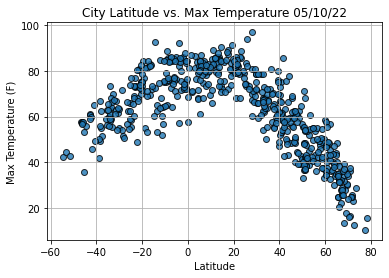

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

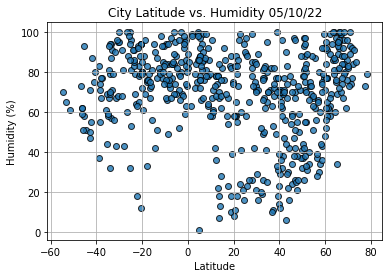

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

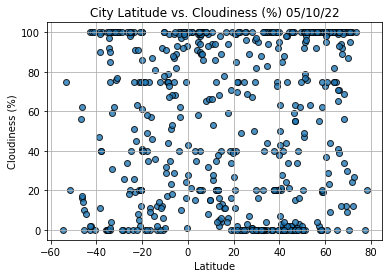

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

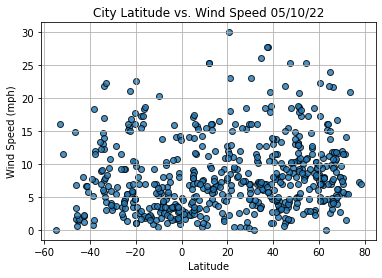

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()